## `RGB` & `LAB` Color Space

**References:**
1. [Emil Wallner - Colorizing B&W Photos with Neural Networks](https://blog.floydhub.com/colorizing-b-w-photos-with-neural-networks/)
2. [Yumi's Blog - Color space definitions in python, RGB and LAB](https://fairyonice.github.io/Color-space-defenitions-in-python-RGB-and-LAB.html)

$\rightarrow \text{A Greyscale Image}$ 

- Black and white images can be represented in grids of pixels. Each pixel has a value that corresponds to its brightness. The values span from 0 - 255, from black to white.
<div align='center'>
    <img src='images/greyscale_img.png' title='Greyscale Leaf Image'/>
</div>

* **

$\rightarrow \text{A RGB Image}$ 

- And an color image consists of three layers: RED, GREEN, and BLUE(RGB)
<div align='center'>
    <img src='images/rgb_leaf.png' title='RGB Leaf Image'/>
</div>

- To achieve the color white, for example, you need an equal distribution of all colors. 
    - By adding an equal amount of red and blue, it makes the green brighter. Thus, a color image encodes the color and the contrast using three layers: 
    <div align='center'>
        <img src='images/rgb.png' title='RGB' width=250/>
    </div>
    
    - Just like black and white images, each layer in a color image has a value from 0 - 255. The value 0 means that it has no color in this layer. If the value is 0 for all color channels, then the image pixel is black.
    
* **

$\rightarrow \text{Greyscale to RGB}$ 

- As you may know, a neural network creates a relationship between an input value and output value. To be more precise with our colorization task, the network needs to find the traits that link grayscale images with colored ones.

- In sum, we are searching for the features that link a grid of grayscale values to the three color grids.


<div align='center'>
    <img src='images/grey_rgb.png' title='Greyscale-RGB' width=900/>
</div>

* **

$\rightarrow \text{LAB Color Space}$ 
- **L stands for lightness**, which is a simply a **Greyscale** image, and
- **a** and **b** for the color spectrums **green–red** and **blue–yellow** respectively.

<div align='center'>
    <img src='images/lab_color_space.png' width=500/>
</div>

* **

$\rightarrow \text{Why convert RGB Image to LAB Color Space for Image coloring purpose?}$ 

- As you can see below, a Lab encoded image has one layer for grayscale and have packed three color layers into two.

- This means that we can use the original grayscale image in our final prediction. Also, we only have to two channels to predict.

<div align='center'>
    <img src='images/lab_images.png'/>
</div>

- Our final prediction looks like this:
    - **We have a grayscale layer for input, and we want to predict two color layers, the ab in Lab.** 
    - To create the final color image we’ll include the L/grayscale image we used for the input, thus, creating a Lab image.
    
    <div align='center'>
        <img src='images/img_coloring.png'/>
    </div>

## Code

[Yumi's Blog - Color space definitions in python, RGB and LAB](https://fairyonice.github.io/Color-space-defenitions-in-python-RGB-and-LAB.html)

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

dir_data = ["../input/train/color/1.jpg",
            "../input/train/color/171.jpg"]

target_size = (256,256)
# Get images
Ximg = []
for filename in dir_data:
    Ximg.append(load_img(filename,target_size=target_size))

print(Ximg[0])

<PIL.Image.Image image mode=RGB size=256x256 at 0x1E61C7EF820>


In [12]:
import numpy as np

Xsub_rgb = []
for img in Ximg:    
    Xsub_rgb.append(img_to_array(img))   
    
print(Xsub_rgb[0].shape)
# print(Xsub_rgb[0])

## convert the entire list to numpy array
Xsub_rgb = np.array(Xsub_rgb)

(256, 256, 3)


In [13]:
## Extrat the first few example images
Nsample = Xsub_rgb.shape[0]

def plotMinMax(Xsub_rgb,labels=["R","G","B"]):
    print("______________________________")
    for i, lab in enumerate(labels):
        mi = np.min(Xsub_rgb[:,:,:,i])
        ma = np.max(Xsub_rgb[:,:,:,i])
        print("{} : MIN={:8.4f}, MAX={:8.4f}".format(lab,mi,ma))
        
plotMinMax(Xsub_rgb,labels=["R","G","B"])  

______________________________
R : MIN=  0.0000, MAX=255.0000
G : MIN=  0.0000, MAX=255.0000
B : MIN=  0.0000, MAX=255.0000


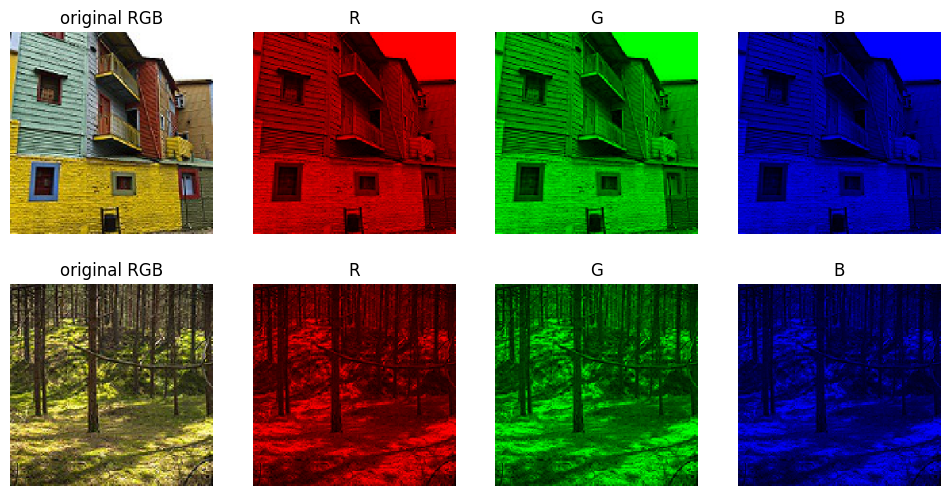

In [14]:
from copy import copy
import matplotlib.pyplot as plt

count = 1
fig = plt.figure(figsize=(12,3*Nsample))
for rgb in Xsub_rgb:
    ## This section plot the original rgb
    ax = fig.add_subplot(Nsample,4,count)
    ax.imshow(rgb/255.0); ax.axis("off")
    ax.set_title("original RGB")
    count += 1
    
    for i, lab in enumerate(["R","G","B"]):
        crgb = np.zeros(rgb.shape)
        crgb[:,:,i] = rgb[:,:,0]
        ax = fig.add_subplot(Nsample,4,count)
        ax.imshow(crgb/255.0); ax.axis("off")
        ax.set_title(lab)
        count += 1
    
plt.show()

In [15]:
Xsub_rgb01 = Xsub_rgb/255.0

In [16]:
from skimage.color import rgb2lab, lab2rgb

Xsub_lab = rgb2lab(Xsub_rgb01)

plotMinMax(Xsub_lab, labels=["L","A","B"])   

______________________________
L : MIN=  0.0000, MAX=100.0000
A : MIN=-29.1153, MAX= 39.9330
B : MIN=-64.5088, MAX= 89.3805


In [17]:
# lab2rgb has to have a dimension (-,-,3) 
Xsub_lab_rgb = np.zeros( Xsub_lab.shape)

for i in range(Xsub_lab.shape[0]):
    Xsub_lab_rgb[i] = lab2rgb(Xsub_lab[i])


plotMinMax(Xsub_lab_rgb.reshape((1,) + Xsub_lab_rgb.shape),labels=["R","G","B"])  

______________________________
R : MIN=  0.0000, MAX=  1.0000
G : MIN=  0.0000, MAX=  1.0000
B : MIN=  0.0000, MAX=  1.0000


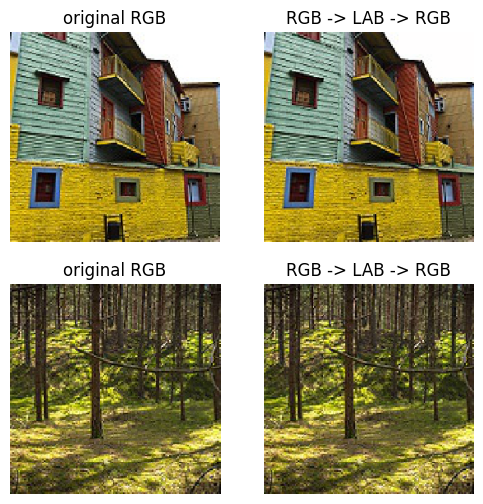

In [18]:
count = 1
fig = plt.figure(figsize=(6,3*Nsample))
for  irgb, irgb2 in zip(Xsub_rgb01, Xsub_lab_rgb):
    ax = fig.add_subplot(Nsample,2,count)
    ax.imshow(irgb); ax.axis("off")
    ax.set_title("original RGB")
    count += 1
    
    ax = fig.add_subplot(Nsample,2,count)
    ax.imshow(irgb2); ax.axis("off")
    ax.set_title("RGB -> LAB -> RGB")
    count += 1
    
plt.show();

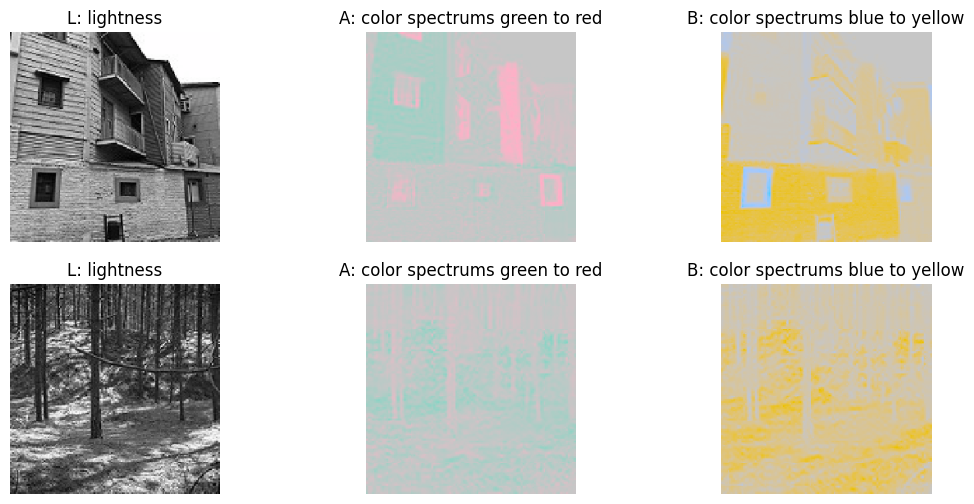

In [20]:
def extract_single_dim_from_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = lab2rgb(z)
    return(z)

count = 1
fig = plt.figure(figsize=(13,3*Nsample))
for lab in Xsub_lab:
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,0) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("L: lightness")
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,1) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("A: color spectrums green to red")
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,2) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("B: color spectrums blue to yellow")
    count += 1
    
plt.savefig("images/lab_images.png")
plt.show()